In [32]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LogisticRegression
from matplotlib import pyplot
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from statistics import mean
import matplotlib.pyplot as plt

In [33]:
matrixDatasetTraintest =  [[[]*4 for j in range(19)] for i in range(10)]

In [34]:
DataMatrix = [ []*2 for i in range(10)]
for i in range(10):
    X, y = make_classification(n_samples=100, n_features=60, n_informative=10, n_classes = 2)
    DataMatrix[i].extend((X, y))

In [35]:
listTestSize = np.arange(0.05, 1, 0.05).tolist()
listTestSize = [round(item, 2) for item in listTestSize]

In [36]:
matrixDatasetTraintest =  [[[]*4 for j in range(19)] for i in range(10)]
for i in range(10):
    for idx, x in enumerate(listTestSize):
        X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=x, shuffle=True)
        matrixDatasetTraintest[i][idx].extend((X_train, X_test, y_train, y_test))

matrixDatasetTraintest

[[[array([[ 1.7250228 , -1.27419063,  0.46276538, ...,  0.93416962,
           -1.83531185,  3.61133123],
          [ 0.3110741 ,  0.19408397, -1.7741179 , ...,  0.98157307,
           -0.27948461, -0.52114234],
          [ 0.65925014, -0.939477  , -0.27795307, ...,  1.11407616,
            1.00485666, -0.85169712],
          ...,
          [-0.86790934,  0.47441741, -0.11049153, ..., -0.74004029,
            0.58003427,  1.1244243 ],
          [-0.36591233,  0.63147837, -0.14146548, ...,  0.39210776,
            1.133199  , -0.43876883],
          [-0.35017952, -0.05018954, -1.68334005, ...,  0.20580871,
            0.90031159, -6.48118627]]),
   array([[ 8.41396901e-01, -1.03545355e-02,  1.61693441e-01,
           -5.77739313e+00, -8.51198232e-01,  1.25581736e+00,
            1.44485678e+00, -4.90290039e-01, -2.51149479e-01,
           -1.66199918e+00, -5.90194682e-01, -7.66897053e-01,
            1.54434489e-01, -1.52265324e+00, -1.41955743e+00,
           -2.15269763e-01,  9.980315

In [37]:
log_regressor = LogisticRegression()

matrix_r2Scores = [ []*19 for i in range(10)]
for i in range(10):
    for particion in matrixDatasetTraintest[i]:
        log_regressor.fit(particion[0], particion[2])
        y_pred = log_regressor.predict(particion[1])
        matrix_r2Scores[i].append(accuracy_score(particion[3], y_pred))
    
matrix_r2ScoresInvertida = [ []*10 for i in range(19)]
for i in range(19):
    for j in range(10):
        matrix_r2ScoresInvertida[i].append(matrix_r2Scores[j][i])

list_meanr2Scores = []
for i in range(19):
    list_meanr2Scores.append(mean(matrix_r2ScoresInvertida[i]))
    
list_meanr2Scores

[0.74,
 0.74,
 0.6933333333333334,
 0.69,
 0.688,
 0.7,
 0.6828571428571428,
 0.6950000000000001,
 0.7022222222222222,
 0.702,
 0.7017857142857142,
 0.6866666666666666,
 0.7092307692307692,
 0.7014285714285714,
 0.676,
 0.6575,
 0.6235294117647059,
 0.5833333333333334,
 0.5168421052631579]

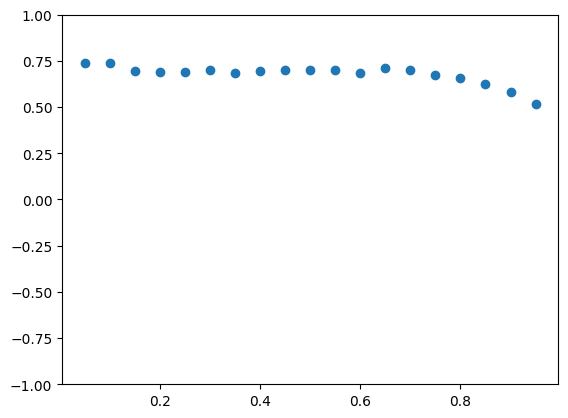

In [38]:
f, ax = plt.subplots(1)
ax.set_ylim(ymin=-1)
plt.scatter(listTestSize, list_meanr2Scores)
plt.show(f)